# Homework Assignment 2
## Agent Based Modeling (ABM), and Graph Theory

### <p style="text-align: right;"> &#9989; Ethan Britten</p>
### <p style="text-align: right;"> &#9989; Corundum248</p>


### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Run and modify agent based models.
* Read and understand someone else's code and be able to use it.
* Use your Pandas/Networkx skills to form a graph from data, visualize it, and answer questions about the data.
* Read documentation to understand and use Networkx methods that you may not be familiar with

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **87 points** possible on this assignment. Point values for each part are included in the section headers and question prompts.

**This assignment is due on Friday, October 25th at 11:59pm ET.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2.  Submission instructions can be found at the end of the notebook.


### Please read the updated Generative AI policy for this course https://msu-cmse-courses.github.io/cmse202-F24-jb/course_materials/CMSE202_GenerativeAI_Policy.html

### In particular, you should not rely solely on AI tools to complete questions in this assignment. Simply copying questions from the assignments into generative AIs and pasting the answers back into the assignments with non-essential modifications are NOT acceptable and may be considered plagiarism.

---
## Part 1: Add to your Git repository to track your progress on your assignment (8 points)

For this assignment, you're going to add it to the `cmse202-f24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f24-turnin` repository and create a new directory called `hw-02`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f24-turnin`" repository inside the `hw-02` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **1.1 Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

<font size=6 color="#009600">&#9998;</font> Put your answer here

**You MUST commit and push your notebook multiple times during this assignment.**

---
## Part 2: ABM for simulating swarming of birds (34 points)

Swarming is a natural phenomenon exhibitied by many species such as fish, bees, and <a href="https://unsplash.com/photos/a-large-flock-of-birds-flying-over-a-field-b7MZ6iGIoSI" alt="Image of a swarm of birds"> birds</a>. Studying this phenomenon not only enhances our standing of biological systems, but it has also inspired <a href="https://fiveable.me/lists/key-swarm-intelligence-algorithms">new intelligent designs and control strategies for engineered systems </a>.



In this part you will study an ABM model for swarming of birds implemented using OOP. The model we use is the two dimensional <a href="https://www.math.ucla.edu/~bertozzi/papers/swarm10.pdf">D'Orsogna model</a>, which studies the interactions of $N$ agents whose motion is characterized by their positions $x_i$ and velocities $v_i$ in time, where $i=1,2,\ldots, N$. The initial state of the flock, i.e., the initial positions and velocities, are chosen indepentently at random from a uniform distribution over $[-1,1]$. Note that the initial distribution does not influence the behavior of the flock after some time has passed. 

The motion of each bird is influenced by local and a global force terms. The local terms are due to self-propelling motion of the bird and drag. The global force captures the pariwise attractive-repulsive social interactions among the birds in the flock. A bird's ability to respond to the presence of another bird decays over space to mimic the decay in sensory signals due to the fading of smell, sight, or sound over longer distances. The attraction term is related to the bird's desire to stay close to its fellow birds. The flock state updates according to a differential equation, but that part of the assignment will be provided in the class `MoveBird`. 

&#9989; **Question 2.1 (8 points)**: First, let's implement the class for the birds in the simulation. All of the required attributes and methods for the `Bird()` class are described in the docstrings. Read the docstrings and implement the needed attributes and methods including `__init__()` as needed. To clarify how the visual field is defined, see the figure below. 

Note that you will get a chance to test out the code in Question 2.4. If that test doesn't do what you excpect, you may need to debug your `Bird()` class code.

<img src="https://github.com/hoolagans/CMSE202_FS24/blob/main/bird_field_of_vision.png?raw=true" alt="illustration of the bird's field of vision" align="center" width="150">

In [7]:
# We will need these imports, so make sure to run this cell before moving on.
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import numpy as np
from scipy.spatial import distance_matrix
from scipy.integrate import solve_ivp
import pandas as pd

In [12]:
# Complete the code for the Bird() class below based on the description in docstrings and the instructions in the comments.

class Bird:

    '''
    This class defines the attributes and methods for the bird class.

    Attributes
    ----------
    bird_type : string
        The type of the bird, e.g., hawk, pigeon, etc.
    mass : float
        The mass of the bird in kilograms.
    visual_field : float
        The visual field of the bird in degrees specified as an angle in degrees.
    wingspan : float
        wingspan of the bird in meters.
    max_speed : float
        bird's maximum flight speed in meters/second.
    alpha : float
        bird's self-propulsion rate in kg/second. 
    beta : float
        bird's drag strength in kg.s/m^2.

    Methods
    -------
    __init__()
    chirp()

    '''

    def __init__(self, bird_type, mass, visual_field, wingspan, max_speed, alpha, beta):
        self.bird_type = bird_type
        self.mass = mass
        self.visual_field = visual_field
        self.wingspan = wingspan
        self.max_speed = max_speed
        self.alpha = alpha
        self.beta = beta
        pass

    def chirp():
        """
        Prints 'Chirp..Chirp'

        Parameters
        ----------
        None

        Returns
        -------
        None
        """
        print('Chirp..Chirp')
        pass

Here we provide partial code for the `Flock` class. This class has three methods:
1. `__init__()`: Populates the class parameters, and generates a random $N \times 4$ array for the initial positions $x$ and $y$ and velocities $v_x$ and $v_y$. The columns of the matrix contain the random values $(x,y,v_x, v_y)$ in that order. 
2. `get_rel_placement_within_flock()`: Obtain the Euclidean distances $|\mathbf{x_i}-\mathbf{x}_j|$ between $i$ th bird and the rest, and unit vecotrs $u_{ij}$ pointing from the $i$ th bird to the rest for every bird in the flock. See the figure below for an illustration of these two quantities for the $i$ th bird. 
3. `accept_bird_mover()`: This is a method to help with solving the needed differential equations.
4. `animate_flock()`: We will use this to animate the flocking behavior.

Run the code cell below so that you can answer the following questions. 

<img src="https://github.com/hoolagans/CMSE202_FS24/blob/main/flock_relative_positions.png?raw=true" alt="Example heading unit vectors for a bird in the flock." align="center" width="280">

In [13]:
### DO NOT EDIT THIS CODE CELL
### DO NOT EDIT THIS CODE CELL
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

class Flock:

    '''
    This class defines the attributes and methods for the flock class, which is composed of Bird objects. 

    Attributes
    ----------
    N : int
        The number of birds in the flock.
    bird_dict: Dictionary of Bird objects
        A dict of N objects of class Bird
    group_name: str
        What is a group of the selected birds typically called, e.g., brood of chickens, dole of doves, etc.
    states : numpy array
        N x 4 states of the flock, i.e., the positions (x,y) and velocities (xdot, ydot).
    velocities : numpy array
        velocities of the birds within the flock
    velocity : numpy array
        velocity of the birds within the flock
    Cr : float
        Repulsive potential amplitude.
    Ca : float
        Attractive potential amplitude.
    Lr : float
        Repulsive potential range.
    La : float
        Attractive potential range    
    '''

    def __init__(self, group_name, Cr, Ca, Lr, La, bird_list):
        
        self.group_name = group_name
        self.Cr = Cr
        self.Ca = Ca
        self.Lr = Lr
        self.La = La
        
        # initialize a list of N random locations and velocities uniformly distributed over the square [-1,1] x [-1,1] in the xy plane
        # first two columns are the (x,y) positions, thrid and fourth columns are velocities (xdot, ydot)
        rng = np.random.default_rng()

        # get the number of birds in bird_list, or initialize a default list of birds
        if bird_list is None:
            N = 10
            self.N = 10
            rand_states = rng.uniform(low=-1, high=1, size=(N, 4))
            # set the states (position and velocity)            
            self.states  = rand_states
            # initialize a dictionary of bird objects with the obtained random locations and velocities
            self.bird_dict = {k: [Bird(), self.states[k]] for k in range(N)}
        else:
            N = len(bird_list)
            self.N = N
            rand_states = rng.uniform(low=-1, high=1, size=(N, 4))
            # set the states (position and velocity)
            self.states  = rand_states
            # initialize a dictionary of bird objects with the obtained random locations and velocities
            self.bird_dict = {k: [bird_list[k], self.states[k]] for k in range(0,N)}

    def get_rel_placement_within_flock(self):

        '''
        This method returns a dictionary that includes the relative distance and heading (as a unit vector)
        between each of the birds in the flock.        

        Inputs
        ------
        points: numpy array

        returns
        -------
        A dictionary where the keys are integers representing each bird, and each value is a list that contains two vectors, one for the distances between the 
        keyed bird and all the other birds, while the second vector is the relative heading (as unit vectors) from the keyed bird to all the others. 
        '''

        G = {}
        matrix = distance_matrix(self.states[:, 0:2], self.states[:, 0:2])
        for i in range(0,len(matrix)):
            k_values = []
            distances = matrix[i]
            indexmin = np.argsort(distances)
            k_values = indexmin[1:]

            # For the ith bird, get unit vectors pointing from the ith bird to all the other birds. These are relative heading vectors.
            rel_heading = (self.states[k_values, 0:2] - self.states[i, 0:2]) / np.reshape(distances[k_values], (len(distances)-1,1))
            G[i] = [distances[k_values], rel_heading]
        return G


    def accept_bird_mover(self, bird_mover):

        '''
        This method allows the integrator to access the Flock class methods.

        Inputs
        ------
        bird_mover: BirdMover
            A concrete instance of the BirdMover class that implements an ODE solver to move the flock. 
            (This is an implementation of the visitor pattern).

        returns
        -------
        None

        '''

        bird_mover.simulate_flock(self)


    def animate_flock(self,simulation,t_vec, fig_bounds, metadata, save_as='animation.gif', dpi=1920/16, fps=15, labels=['x', 'y'],animate_what='locations'):
        '''
        This method animates either the positions (as scatter plot) or velocities (as quiver plots) of Flock objects.

        Inputs
        ------
        simulation: BirdMover
            A concrete instance of the BirdMover class that that contains a solution.         
        t_vec: numpy array
            An array that defines the time steps to use in the animation.
        fig_bounds: list
            [xmin, xmax, ymin, ymax] for the figure used in the animation
        metadata: dictionary
            Meta data to save with the anmication. For example, dict(title='file_name.gif', artist='artist_name')
        save_as: string
            file name used to save the animation.
        dpi: float
            Dots per Inch. The higher the dpi, the more detailed the animation will be.
        fps: int
            frames per second
        labels: list
            A list with two strings containing the labels to use for the x- and y-axis in the animation
        animate_what: string
            Either 'locations' to obtain a scatter plot of the flock or 'velocities' to obtain a quiver plot of the flock velocities. In both cases the plotted data is colored according to speed.
        
        returns
        -------
        None

        '''
        # initilize an empty figure
        fig1 = plt.figure(figsize=(16, 9), dpi=(1920/16))
        ax1 = fig1.add_subplot()

        # set the bounding box for the figure
        xmin, xmax, ymin, ymax = fig_bounds

        ax1.set_xlim([xmin, xmax])
        ax1.set_ylim([ymin, ymax])
        ax1.set_autoscale_on(False)

        # add figure labels
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

        # we will create a Gif using PillowWriter object
        writer = PillowWriter(fps, metadata=metadata)
        sct = None        
        with writer.saving(fig1, save_as, dpi):
            for tval in t_vec:
                z = simulation.solution.sol(tval)

                # get the position, instantanteous velocity, and speed of the birds at tval
                xpos= z[:2*N:2]
                ypos = z[1:2*N:2]
                xvel = z[2*N:4*N:2]
                yvel = z[2*N+1:4*N:2]
                speed = np.sqrt(xvel**2 + yvel**2)

                if sct is not None:
                    sct.remove()
                
                if animate_what == 'locations':
                    sct = plt.scatter(xpos, ypos,c=speed)
                elif animate_what == 'velocities':
                    sct = plt.quiver(xpos, ypos, xvel, yvel, speed)   
                else:                    
                    raise ValueError("Unreognized what_if option '{}'. Please use either 'positions' or 'velocities'".format(animate_what))
                    

                writer.grab_frame()
### DO NOT EDIT THIS CODE CELL
### DO NOT EDIT THIS CODE CELL

&#9989; **Question 2.2 (4 points)** **Answer this:** What is the purpose of the 144-154 (shown below) of the `get_rel_placement_within_flock()` method?
```python
    G = {}
    matrix = distance_matrix(self.states[:, 0:2], self.states[:, 0:2])
    for i in range(0,len(matrix)):
        k_values = []
        distances = matrix[i]
        indexmin = np.argsort(distances)
        k_values = indexmin[1:]

        # For the ith bird, get unit vectors pointing from the ith bird to all the other birds. These are relative heading vectors.
        rel_heading = (self.states[k_values, 0:2] - self.states[i, 0:2]) / np.reshape(distances[k_values], (len(distances)-1,1))
        G[i] = [distances[k_values], rel_heading]]
```


<font size=6 color="#009600">&#9998;</font> The purpose is to create a dictionary that contains the distances of nearby birds and their relative headings. 

I presume the distance to nearby birds will be used to judge what direction a bird should move based on the nearest members


To make it easier to solve the simulation, we provide the class `BirdMOver` to handle the numerical simulation. 

Run the code block below before proceeding.

In [14]:
class BirdMOver:
    def __init__(self, tspan, y0=None, method='RK45',dense_output=True):
        # set integration parameters
        self.tspan = tspan
        self.y0 = y0
        self.method = method
        self.sol = None
        self.dense_output = dense_output
        self.solution = None


    def simulate_flock(self, flock):
        N = flock.N

        # set y0 from flock attributes, if not explicitly passed
        if self.y0 is None:
            # recover the states matrix
            states_matrix = np.vstack(list(flock.states))
            # now obtain the vector of states [x1, y1, x2, y2, ..., xN, yN, xdot1, ydot1, ..., xdotN, ydotN]
            self.y0 = np.reshape([np.ravel(states_matrix[:,0:2]),np.ravel(states_matrix[:,2:4])],(states_matrix.size,))    
        
        # extract alpha, beta, and m from each bird in the flock
        alpha_vec = np.zeros((flock.N, 1))
        beta_vec  = np.zeros((flock.N, 1))
        mass_vec = np.zeros((flock.N, 1))
        for k in range(N):
            alpha_vec[k] = flock.bird_dict[k][0].alpha
            beta_vec[k] = flock.bird_dict[k][0].beta
            mass_vec[k] = flock.bird_dict[k][0].mass

        # simulate, then call update Bird's concrete instance's state.
        solution = solve_ivp(fun=lambda t,y: self.Orsogna_model(t, y, flock, alpha_vec, beta_vec, mass_vec), t_span=self.tspan, y0=self.y0, method=self.method, dense_output=self.dense_output)

        self.solution = solution
        

    def Orsogna_model(self, t, y, flock, alpha_vec, beta_vec, mass_vec):

        N = flock.N
        # generate m, alpha, and beta matrices so we can write the right hand side of the differential eqs.
        mass_vec = np.ravel(np.tile(mass_vec, (2,1)), order='F')
        alpha_vec = np.ravel(np.tile(alpha_vec, (2,1)), order='F')
        beta_vec = np.ravel(np.tile(beta_vec, (2,1)), order='F')

        # get the speed |v_i|=np.sqrt(v_ix^2+v_iy^2) of each agent
        speeds = np.sqrt(np.sum(np.reshape(y[2*N:4*N], (N,2))**2,axis=1))
        speed_vec = np.ravel(np.tile(speeds, (2,1)), order='F')        

        # update flock states
        flock.states = np.concatenate([np.reshape(y[0:2*N], [N,2]), np.reshape(y[2*N:4*N], [N,2])], axis=1)

        # Get the dictionary with unit vectors from each bird to the rest of the flock
        G = flock.get_rel_placement_within_flock()

        # Get the generalized Morse potential gradient Del U(x)
        DelU = np.zeros((N,2))
        for k in range(N):
            # get distances and headings for the kth bird
            distances = G[k][0]
            headings = G[k][1]

            # compute DelU_k
            DelU[k] =  np.sum(-headings * np.expand_dims((-flock.Cr/flock.Lr * np.exp(-distances/flock.Lr) + flock.Ca/flock.La * np.exp(-distances/flock.La)),axis=-1),axis=0)

        dxdt = y[2*N:4*N]
        dxdotdt = 1/mass_vec * ((alpha_vec  - beta_vec * speed_vec**2) * y[2*N:4*N] - np.ravel(DelU))

        return np.ravel([dxdt, dxdotdt])

&#9989; **Question 2.3 (5 points)**: We will need to do some research before initializing the birds and their flocks.  Do the following:
1. Choose what kind of birds you will use for the flock. Do an internet search on the following attributes of your chosen bird:
    1. Averge mass
    2. Visual field specified as an angle in degrees.
    3. Wingspan.
    4. Maximum speed.
    5. The name typically used for a group of the chosen bird type (e.g., gaggle, pod, pack, etc.). 

No points will be awarded for any part of the answer missing citations. If you cannot find an exact reference for the bird you chose, it's ok to extrapolate based on the characteristics of similar birds, but make sure to note what you did.

<font size=+3>&#9998;</font> Seagulls

Average Mass: .738

Visual Field: 300

Wingspan: .130

Maximum Speed: 12.5

Group name : flock 

&#9989; **Question 2.4 (3 points)**: Now it is time to start setting up the simulation. 
1. Enter the missing values in the code below based on your bird choice. We will start with $N=40$ birds. After you get the simulation working, you can experiment with larger flocks. We will try different values for $C_r$, $L_r$, $C_a$, and $L_a$ later. 
2. Create a list of `Bird` objects by completing the for loop line.

In [15]:
# Put your code for Question 2.4 here

# bird paramters
mass =  .738
bird_type = 'Seagull'
visual_field = 300
max_speed = 12.5
wing_span = .30

alpha = 1  # bird's self-propulsion rate in kg/second.
beta = 0.5  # drag strength in kg.s/m^2.

# flock parameters
N = 40  # number of brids in the flock
group_name = 'flock'
Cr = 0.6
Lr = 1.2
Ca = 1
La = 1  

# Instantiate the Bird class
bird_list = []
for k in range(0, N):
    bird_list.append(Bird(bird_type, mass, visual_field, wing_span, max_speed, alpha, beta))
    pass    

&#9989; **Question 2.5 (4 points)**: Now we are ready to instantiate `Flock` objects, and run the simulation. Do the following:
1. Instantiate a `Flock` object that contains the bird list that you defined above. This should be a one-liner.
2. Insert the commnads for calling the `animate_flock()` method on the Flock object as indicated in the code block. Run the code block. It will generate two gif files in your working directory. One will animate the movement of the flock over time (flock\_animation.gif), and the other shows the velocity of each bird over time (flock\_headings.gif). 

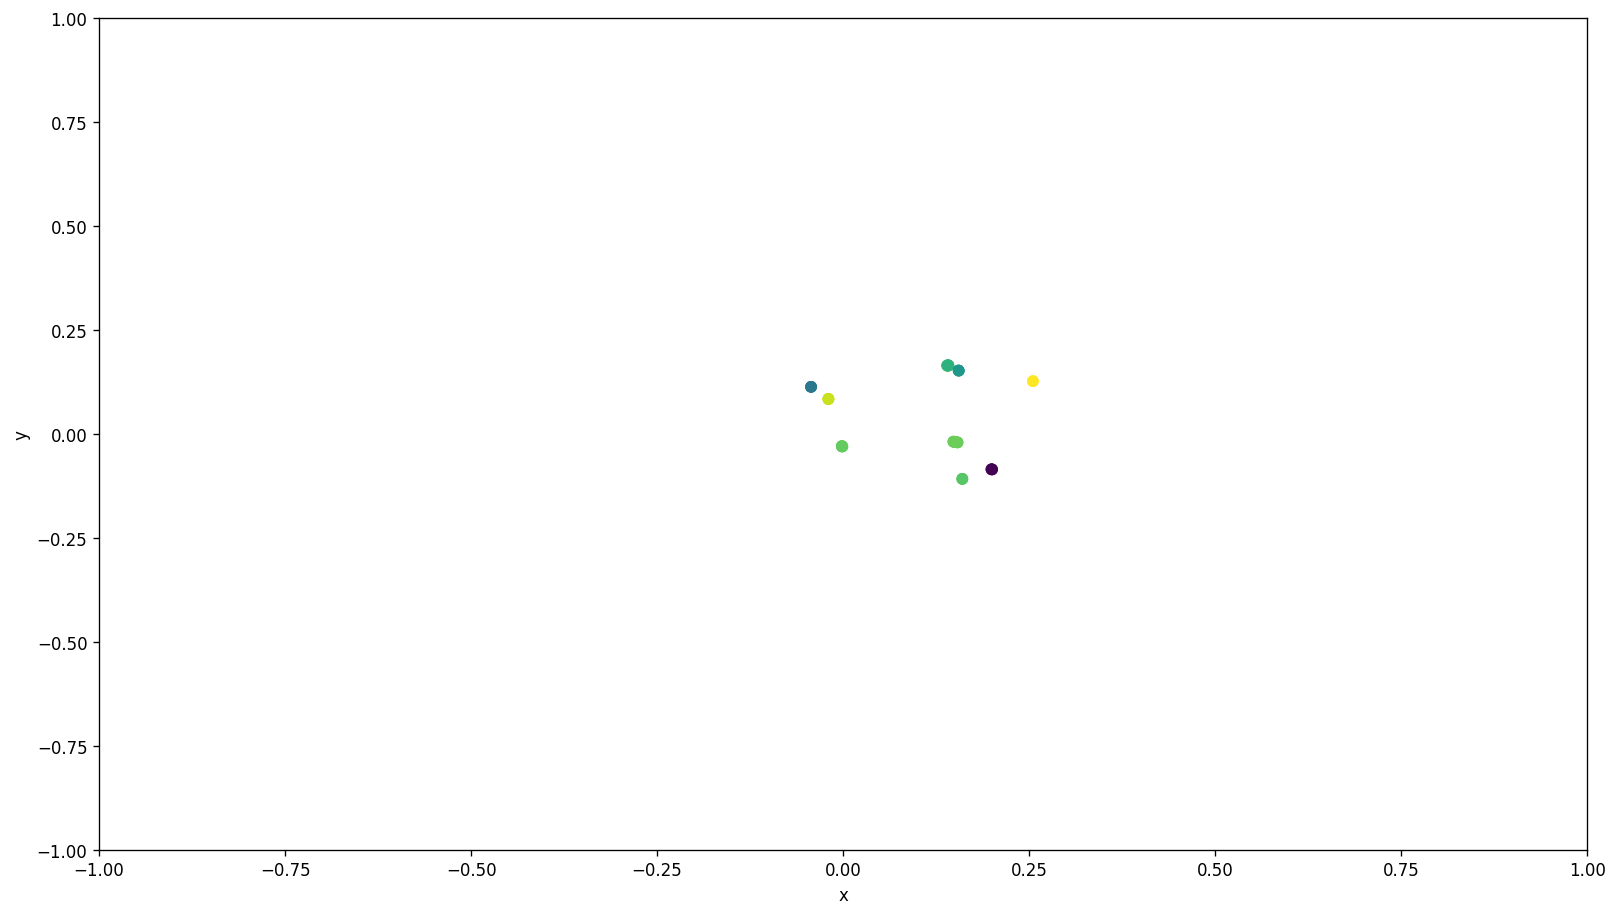

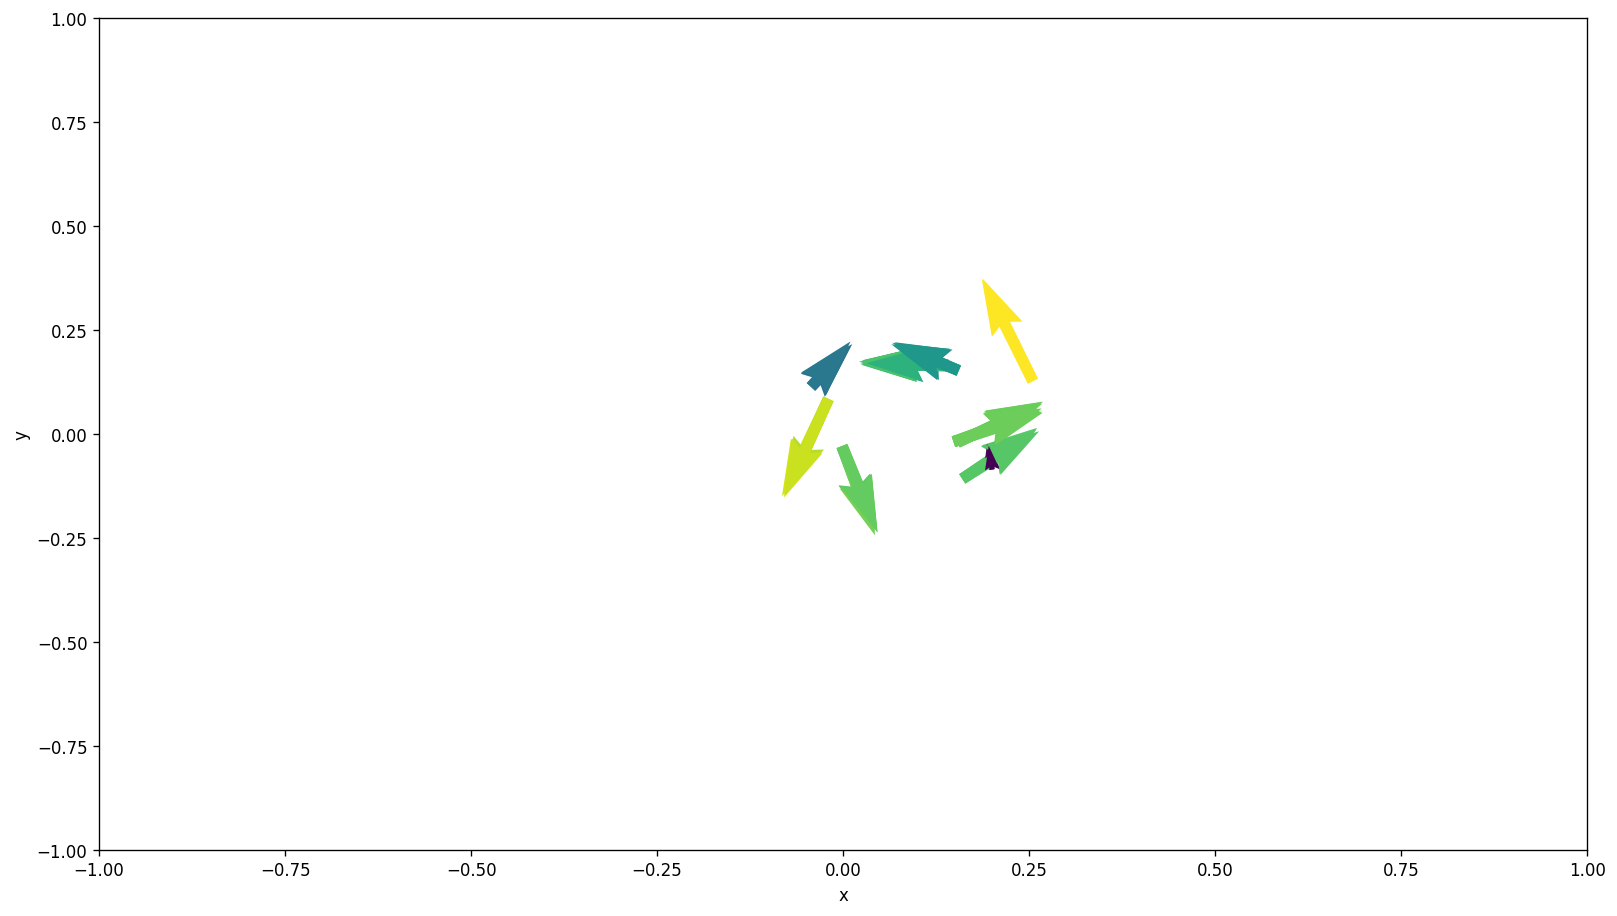

In [19]:
# Put your code for Question 2.5 here
## Answer

# Instantiate the flock
my_squad = Flock(group_name, Cr, Ca, Lr, La, bird_list)
# <----------------------------------------------------------------------------------------------Instantiate the flock here




# Instantiate the integrator birdMover
# birdMover (integrator) parameters
# start/end time of the simulation in seconds. Transients approximately decay at mass/alpha, so we simulate twice as much.
tspan = [0, 30]  
simulation = BirdMOver(tspan)
# Perform the integration
simulation.simulate_flock(my_squad)

# We will now create an animation of the flock. Define the time points that will be used in the animation, and create the time vector.
nsteps = 150  # number of time vector points to evaluate the solution on
t_vec = np.linspace(tspan[0], tspan[1], nsteps)

# add metadata to the animation
metadata = dict(title='flock_movement.gif', artist='madScientist')
# define boundaries of the figure
fig_bounds = [-1, 1, -1, 1]  # [xmin, xmax, ymin, ymax]
# file name for the animation
file_name = 'flock_animation.gif'

# call the animate_flock method to animate flock locations
my_Flock.animate_flock(simulation=simulation, t_vec=t_vec, fig_bounds=fig_bounds, metadata=metadata, save_as=file_name)
# <------------------------------------------------------------------------------------------------- call the animate_flock method here to animate positions


# let's create another animation for the velocity field of the flock. We will use nsteps and t_vec from above.
# add metadata to the animation
metadata = dict(title='flock_headings.gif', artist='madScientist')

# define boundaries of the figure
fig_bounds = [-1, 1, -1, 1]  # [xmin, xmax, ymin, ymax]
# file name for the animation
file_name = 'headings_animation.gif'

# call the animate_flock method
# <------------------------------------------------------------------------------------------------- call the animate_flock method here to animate velocities
my_squad.animate_flock(simulation=simulation, t_vec=t_vec, fig_bounds=fig_bounds, metadata=metadata, save_as=file_name, animate_what='velocities')

&#9989; **Question 2.6 (8 points)**: If all goes well, you should obtain a gif showing the birds flying in clumps along a ring similar to the animation below (I used nsteps=300, and tspan=[0,60] to make the animation smoother and longer). 
The gif on the left shows positions over time, while the plot on the right is a quiver plot of the velocities. The color in both animations corresopnds to the velcities of the birds. 

<table>
    <tr>
        <td><img src="https://github.com/hoolagans/CMSE202_FS24/blob/main/flock_animation_case_c.gif?raw=true" alt="flock position animation." width="800"  align="center" title="Animation of flock positions." >
        <td><img src="https://github.com/hoolagans/CMSE202_FS24/blob/main/headings_animation_case_c.gif?raw=true" alt="flock velocity animation." width="800" align="center" title="Animation of flock velocities.">
    </tr>
</table>

Different flock parameters can lead to different swarming behavior, or even the collapse of the flock! For example for some parameters the birds might individually fly away from the swarm, or the swarm may break up into clumps that fly away from the rest of the swarm. Let's test some scenarios.
1. Set $N=40$, tspan=[0, 30].
2. Describe what you see when you choose the parameters $C_r$, $C_a$, $L_r$, and $L_a$ such that the system is in regions a, b (the red diagonal dashed line), and d. The animations provided above are for region c. Run the simulation for each parameter combination, and examine the resulting animations. 
* __Hint1__: Note that the ratios $C=\frac{C_r}{C_a}$, and $L=\frac{L_r}{L_a}$ are the $x$ and $y$ axes, respectively, of the figure below. Choose parameter combinations that make these ratios land in the regions indicated in the figure. What type of behavior do you observe in each region? You must include the parameters that you chose for each region with your answer. 
* __Hint2__: start with grid_bound=[-1,1,-1,1]. If the birds leave that bound, try expanding image boundary and re-animate to get a better view of wht the flock is doing. Also, increasing nsteps from 150 to 200, or 300 will create a smoother animation, but may increase the runtime. 

<img src="https://github.com/hoolagans/CMSE202_FS24/blob/main/flock_parameter_chart.png?raw=true" alt="Diagram showing partitioned space of the D'Orsonga model." align="center" style="width:25%"/>

In [11]:

#-------------------------Generate simulation in A
bird_list_a = []
for k in range(0, 40):
    bird_list_a.append(Bird(bird_type, mass, visual_field, wing_span, max_speed, alpha, beta))
    pass    
Cr=0.4
Ca=0.5
Lr=0.2
La=0.5
my_squad = Flock(group_name, Cr, Ca, Lr, La, bird_list_a)
file_name = 'headings_animation_a.gif'
my_squad.animate_flock(simulation=simulation, t_vec=t_vec, fig_bounds=fig_bounds, metadata=metadata, save_as=file_name, animate_what='velocities')
#-------------------------Generate simulation in C
bird_list_c = []
for k in range(0, 40):
    bird_list_c.append(Bird(bird_type, mass, visual_field, wing_span, max_speed, alpha, beta))
    pass    
Cr=0.2
Ca=0.5
Lr=0.4
La=0.5
my_squad = Flock(group_name, Cr, Ca, Lr, La, bird_list_b)
file_name = 'headings_animation_c.gif'
my_squad.animate_flock(simulation=simulation, t_vec=t_vec, fig_bounds=fig_bounds, metadata=metadata, save_as=file_name, animate_what='velocities')
#-------------------------Generate simulation in D
bird_list_d = []
for k in range(0, 40):
    bird_list_d.append(Bird(bird_type, mass, visual_field, wing_span, max_speed, alpha, beta))
    pass    
Cr = 0.2
Ca = 0.5
Lr = 2
La = 0.5
my_squad = Flock(group_name, Cr, Ca, Lr, La, bird_list_d)
file_name = 'headings_animation_d.gif'
my_squad.animate_flock(simulation=simulation, t_vec=t_vec, fig_bounds=fig_bounds, metadata=metadata, save_as=file_name, animate_what='velocities')

NameError: name 'Bird' is not defined

**<font size=+3>&#9998;</font> Put your observations here:**

When the ratio is in A (C > L ; L and C < 1): The seagulls all fly around a central point around x=0.0 & y=0.0. The seagulls at first fly into this point buut soon their flight turns into a counter-clockwise motion where no seagulls flies into the center, much like a stable orbit around a planet. The orbit itself is slightly oblong with the major axis along the X-axis. 

When the ratio is in C (C < L ; L and C < 1): Like when the ratio is in A, the seagulls coalesce into a clockwise motion but the shape of the paths is not a defined shape. It seems unstable and not a steady shape like when the ratio is in A. 

When the ratio is in D (C < L ; L > 1 > C): Like A & C, the seagulls form a counter-clockwise rotational motion. The animation is like that of when the ratio is A; the seagull motion a somewhat defined oblong shape

There are many other interesting investigations you can do on your own with this simulation. For example, you can initialize a list of birds with different masses (maybe the masses are distributed around the average mass that you researched). You can also explore altering the sensory perception of birds (so for example, assume they only respond to other birds in the flock within their eye of sight), etc. Feel free to play around, and let us konw if you get some cool results to share!

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3: Graph theory transportation data (45 points)

In this part of the homework, we will look at a dataset which contains the whole UK public transport system for a week in October 2010 [[1](https://doi.org/10.1038/srep38994), [2](https://doi.org/10.1038/sdata.2014.56), [data file](https://datadryad.org/stash/dataset/doi:10.5061/dryad.pc8m3)]. We will model this data as a graph where each team is terminal where travel starts/stops is a node. We will later add directionarlity to capture the departure arrival relationship, and weights on edges that represent travel time. 

&#9989;  **Question 3.1 (3 points)**: Go to [this website](https://datadryad.org/stash/dataset/doi:10.5061/dryad.pc8m3) and download the full data set. Unpack the .zip file into your working directory. The data we need is in the folder Data_Release_v1.11. After you unzip the folder, you will see edges.csv and nodes.csv, plus some other files. The former two are the ones we will primarily work with here. 

**Do This:** Load the nodes.csv and edges.csv in this file into `Pandas` `DataFrames`. Display the first few and last few rows of each. 

In [1]:
# Write your code here
import pandas as pd
df_node = pd.read_csv('nodes.csv')
df_edge = pd.read_csv('edges.csv')
print(df_node.head(5))
print(df_node.tail(5))
print(df_edge.head(5))
print(df_edge.tail(5))

   node  layer       lat      lon  zone      atcocode
0     0      5  51.40078 -0.46353   400  400G4402814B
1     1      2  51.85401  0.99745   150   910GALRESFD
2     1      5  51.85401  0.99745   150   910GALRESFD
3     1      4  51.85401  0.99745   150   910GALRESFD
4     2      5  52.40505 -0.33145    50  050GHE001002
          node  layer       lat      lon  zone      atcocode
267026  262380      5  53.14790 -2.74935    61    0610CHM192
267027  262381      5  53.46551 -2.11037   180   1800EH46491
267028  262382      5  53.31307 -2.98529   280   2800S28020B
267029  262383      5  53.31208 -2.98399   280   2800S28020A
267030  262384      5  52.45683 -1.91376   430   43000341401
   ori_node  des_node  ori_layer  des_layer  minutes       km
0       325     31793          1          1        7    0.707
1       338     36564          1          1        7    0.920
2       348     46689          1          1        5    0.439
3       601     44530          1          1      495  164.555


Now, you will construct a graph of the nodes (stops). 

&#9989;  **Question 3.2 (5 points)**: Create an empty (undirected, unweighted)`Graph` object from the `networkx` package. For each row of the `DataFrame` where both the destination and origin are associated to "Rail," i.e., the integer 2 in both ori_layer and des_layer of edges.csv, add an edge between the origin (ori_node) and the destination (des_node) nodes.  

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import numpy as np
from scipy.spatial import distance_matrix
from scipy.integrate import solve_ivp
import pandas as pd
import networkx as nx

In [6]:
#Shave the data to what is wanted
shaved_edges = df_edge[(df_edge['ori_layer'] == 2) & (df_edge['des_layer'] == 2)] #shave df_edge to data where layers = 2
shaved_nodes = df_node[(df_node['layer'] == 2)]  #shave df_node to data where layer=2

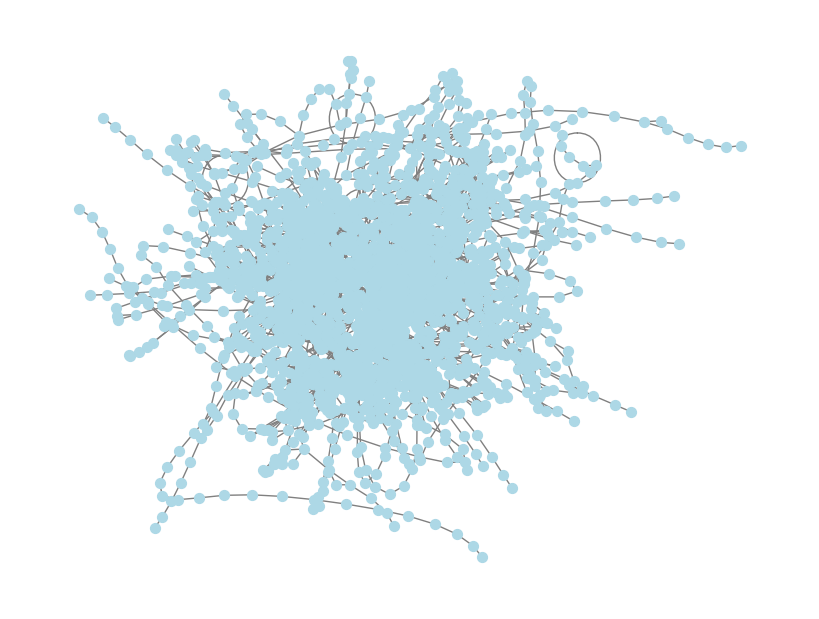

In [7]:
import networkx as nx
G = nx.Graph()
for index, row in shaved_edges.iterrows():        #add the edges between nodes
   G.add_edge(row['ori_node'], row['des_node'])
#--------------------------------------------------------Graph nodes
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_color='lightblue', node_size=50, font_size=10, font_color='black', edge_color='gray')
plt.show()

Plotting the graph. 

&#9989;  **Question 3.3 (5 points)**: Plot the graph using the latitude and longitude of each node as its position, labeled by the columns lat and lon, respectively in nodes.csv. 

(1, {'pos': (0.99745, 51.85401)})
(22, {'pos': (-2.90449, 53.54282)})
(58, {'pos': (0.21926, 51.44737)})
(66, {'pos': (-2.86756, 53.61132)})
(77, {'pos': (-4.50362, 55.83469)})
(80, {'pos': (-3.26164, 56.14125)})
(102, {'pos': (-2.76059, 51.58478)})
(115, {'pos': (-4.09357, 52.58559)})
(153, {'pos': (-0.42067, 51.5031)})
(216, {'pos': (-0.20516, 51.40299)})
(247, {'pos': (-1.42341, 53.70053)})
(249, {'pos': (-0.14303, 51.61412)})
(250, {'pos': (-0.31724, 51.68519)})
(255, {'pos': (-1.62078, 51.17006)})
(334, {'pos': (-2.51839, 53.73288)})
(335, {'pos': (-0.10218, 51.4663)})
(336, {'pos': (-0.1003, 51.39878)})
(349, {'pos': (-5.11094, 50.17027)})
(351, {'pos': (0.17895, 51.44828)})
(385, {'pos': (-1.72548, 52.34128)})
(0.99745, 51.85401)


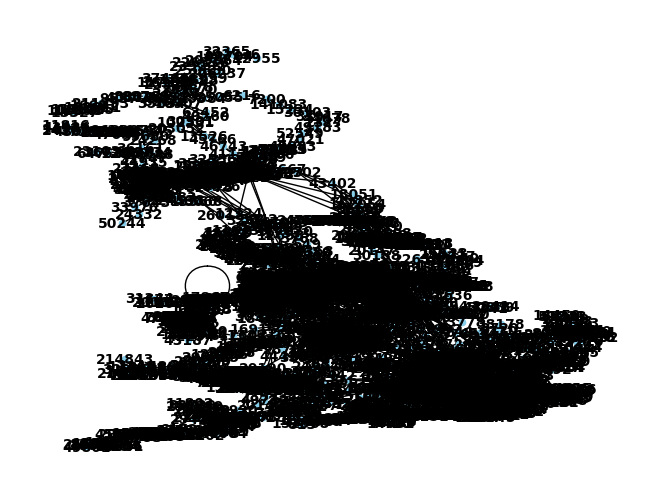

In [60]:
# Write your code here
G_node = nx.Graph()
for index, row in shaved_nodes.iterrows():        #add the edges between nodes
    G_node.add_node(row['node'],pos=(row['lon'],row['lat']))
for index, row in shaved_edges.iterrows():        #add the edges between nodes
   G_node.add_edge(row['ori_node'], row['des_node']) #add connections between rows


#------------------------Test to see if positions are there....
nodes_at = list(G_node.nodes(data=True))
lim = 0
for edge in nodes_at:
    if lim < 20:
        print(edge)
    lim = lim + 1
    
pos = nx.get_node_attributes(G_node, 'pos')
nx.draw(G_node, pos, with_labels=True, node_size=20, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

Next, you will construct the weighted directed graph to represent this data. 

&#9989;  **Question 3.4 (5 points)**: Create an empty `DiGraph` object from the `networkx` package. For each row of the `DataFrame`where both the destination and origin are associated to "Rail," i.e., the integer 2 in both ori_layer and des_layer of edges.csv, add a directed edge from the node corresponding to the origin node (ori_node) to the destination_node (des_node). 

For directed graphs, the parameter *weight* can be used to specify the weight of each edge. Use the kilometers distance (`km` in edges.csv) between the origin and destination nodes as the weight for each edge.

Note: Remember that each edge in a directed graph has an orientation. So adding an edge from node A to node B is not the same thing as adding an edge from node B to node A. 

In [55]:
# Write your code here
#Q 3.4 does not ask that I display the graph

#--------------------------------Make the weighted graph
DiGraph = nx.DiGraph()
for index, row in shaved_nodes.iterrows():        #add the edges between nodes
    DiGraph.add_node(row['node'],pos=(row['lon'],row['lat']))
for index, row in shaved_edges.iterrows():        #add the edges between nodes
    DiGraph.add_edge(row['ori_node'], row['des_node'],weight = row['km']) #add connections between rows

#-------------------------Test to see if they have correct distances
edges_at = list(DiGraph.edges(data=True))
lim = 0
for edge in edges_at:
    if lim < 20:
        print(edge)
    lim = lim + 1
#------------------------Test to see if the edge values go both ways...
print(DiGraph[1][19713.0])
print(DiGraph[19713.0][1])


(1, 19713.0, {'weight': 4.65})
(1, 34938.0, {'weight': 2.846})
(22, 36247.0, {'weight': 1.436})
(22, 41454.0, {'weight': 4.393})
(58, 351.0, {'weight': 2.791})
(58, 2687.0, {'weight': 3.112})
(58, 2702.0, {'weight': 4.141})
(58, 31956.0, {'weight': 4.562})
(58, 34697.0, {'weight': 3.016})
(58, 46330.0, {'weight': 8.327})
(58, 46973.0, {'weight': 10.246})
(66, 1695.0, {'weight': 1.83})
(66, 253293.0, {'weight': 3.387})
(77, 2141.0, {'weight': 19.267})
(77, 5973.0, {'weight': 8.778})
(77, 28464.0, {'weight': 15.062})
(77, 30668.0, {'weight': 2.137})
(77, 40520.0, {'weight': 5.127})
(77, 48179.0, {'weight': 4.572})
(77, 50339.0, {'weight': 23.665})
{'weight': 4.65}
{'weight': 4.65}


&#9989;  **Question 3.5 (5 points)**: Plot the directed graph using the spring_layout option, __not the spatial coordinates you used in 3.4.__, for nodes' positions.

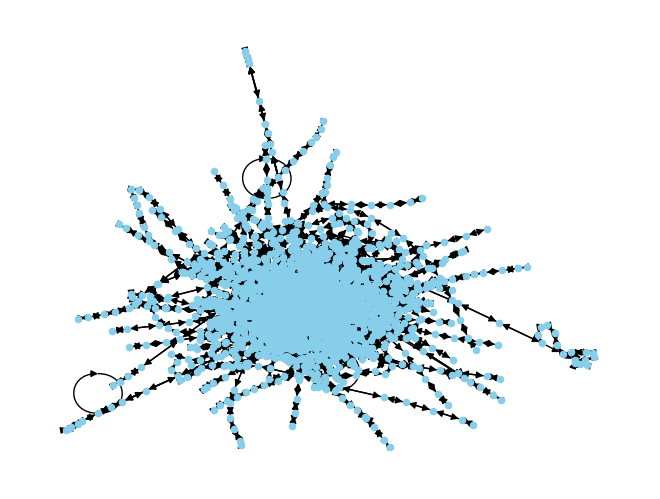

In [6]:

pos1 = nx.spring_layout(DiGraph)
nx.draw(DiGraph, pos1, with_labels=False, node_size=20, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')


&#9989;  **Question 3.6 (5 points)**: When making travel plans for individuals and freight, it is often helpful to find the shortest path from origin to destination stations. 

**Do this**: Our goal is to make a function that takes in the directed graph that you created along with two nodes representing the origin and destination stations, and then prints a sequence of statements of the form "Take [origin_nodeID] to [destination_nodeID]" which can be used to make travel plans along the shortest path from the origin to the destination`. For multiple transitions, the code must print out the sequence of statements "Take [origin_nodeID]{i} to [destination_nodeID]{i+1}".

Make sure to include an error in case a path does not exist between the requested source and origin. See the documentation on [Exceptions](https://networkx.org/documentation/stable/reference/exceptions.html) in networkx to find an appropriate exception to raise.

In [9]:
# Fill out the following function

def find_itinerary(G,origin_nodeID,destination_nodeID):
    path = nx.shortest_path(G, source=origin_nodeID, target=destination_nodeID, weight='distance')
    print(path)
    for i in range(len(path)):
        if i < len(path) - 1:
            print('Take ',path[i],' to ',path[i+1])
    pass

In [10]:
# use this command to test your code
find_itinerary(DiGraph, origin_nodeID=1, destination_nodeID=169164)

[1, 34938.0, 34872.0, 2837.0, 7300.0, 18467.0, 9862.0, 3860.0, 3220.0, 11215.0, 6675.0, 27851.0, 34946.0, 20981.0, 37496.0, 10441.0, 18955.0, 31292.0, 169164]
Take  1  to  34938.0
Take  34938.0  to  34872.0
Take  34872.0  to  2837.0
Take  2837.0  to  7300.0
Take  7300.0  to  18467.0
Take  18467.0  to  9862.0
Take  9862.0  to  3860.0
Take  3860.0  to  3220.0
Take  3220.0  to  11215.0
Take  11215.0  to  6675.0
Take  6675.0  to  27851.0
Take  27851.0  to  34946.0
Take  34946.0  to  20981.0
Take  20981.0  to  37496.0
Take  37496.0  to  10441.0
Take  10441.0  to  18955.0
Take  18955.0  to  31292.0
Take  31292.0  to  169164


&#9989;  **Question 3.7 (5 points):** Urban mobility hubs are important for urban planning and for sustaininig reliable transportation. Here we will explore the identification of existing urban mobility hubs by using the concept of community structure, purely based on connectivity, i.e., discarding weight and directionarlity information as described below. 

A graph/network is said to have a "[community structure](https://en.wikipedia.org/wiki/Community_structure)" if the nodes can be partitioned into communities such that generally nodes are connected to a high percentage of other nodes in the same community and a low percentage of nodes in other communities. By detecting which nodes of a graph are part of tightly connected transportation network, we can identify urban mobility hubs.

Let's see how easily we can detect this from the data. The Louvain method is one algorithm for community detection. Not required, but check out this link if you're interested in learning more https://en.wikipedia.org/wiki/Louvain_method.

**Do This:** First, make an undirected `Graph` that has the same nodes and edges as your `DiGraph` containing all the rail stops (check out the to_undirected() method in networkx). Next, use the `louvain_communities()` method with `seed = 48823` which is in the `community` subpackage of `networkx` to partition the graph into communities or hubs using the Louvain Community Detection Algorithm. The output of this method is a list of sets where each set represents a community. Finally, print the output of this algorithm. If the list is too long, only print the first 3. 

You may want to read the documentation for the [`louvain_comminities()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html) method.

In [19]:
# Write your code here
#------------Make another undirected graph identical to 
myDiGraph = DiGraph.to_undirected()
#----------------------------
group_no = 1
partition = nx.community.louvain_communities(myDiGraph,seed=48823)
for group in partition:
    if group_no < 4:
        print('-------------------------------------------------------------------------- Group',group_no)
        print(group)
        group_no = group_no + 1

-------------------------------------------------------------------------- Group 1
{9225, 10766, 32782, 5271, 11353, 40220, 38876, 4191, 42656, 21665, 7263, 42147, 2660, 1893, 42918, 10345, 28716, 45933, 6194, 2679, 33592, 19519}
-------------------------------------------------------------------------- Group 2
{4643, 30495, 19110, 37494, 15195, 2431}
-------------------------------------------------------------------------- Group 3
{9600, 8995, 28163, 20998, 1481, 42410, 21866, 22508, 4716, 29097, 36943, 10843}


&#9989;  **Question 3.8 (7 points):** An induced subgraph of a graph is another graph, formed from a subset of the vertices of the graph and all of the edges, from the original graph, connecting pairs of vertices in that subset. A subgraph can be created using the Graph.subgraph() command in networkx. Use the command to create a subgraph of the first community with accuracte spatial positions.

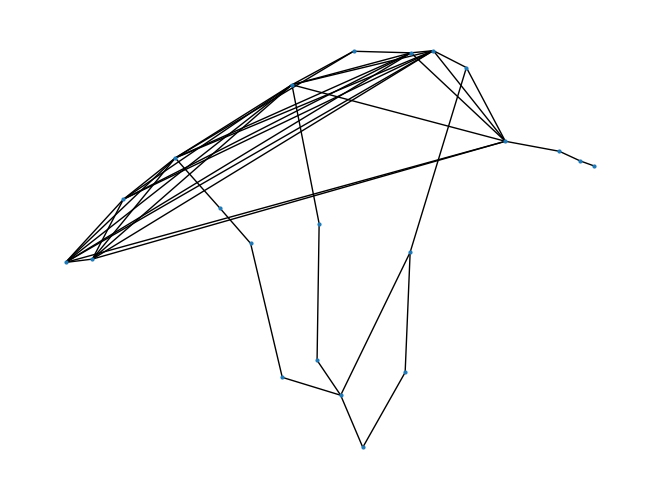

In [26]:
# Write your code here
newGraph = myDiGraph.subgraph(partition[0])
pos = nx.get_node_attributes(newGraph, 'pos')
nx.draw(newGraph, pos, node_size=4)

&#9989;  **Question 3.9 (5 points):** In class, we discussed what the degree of a node was. A node can be considered a hub if it has more connections (higher degree) than other nodes. Identify the top three hubs and state which cities are they located in. 

Were you surprised to see these cities as the hubs, or did this pretty much match where you would expect to find a transportation hub?

In [7]:
# Find the 3 highest degree nodes
node_degrees = dict(G_node.degree())
top_3_nodes = sorted(node_degrees, key=node_degrees.get, reverse =True)[:3]
for i in top_3_nodes:
    print(i,' degrees:',G_node.degree(i))
    print(G_node.nodes[i]['pos'])
    print('-----------------------')

    
#ChatGPT3 was utilized for this question, and information was obtained by using on 10/24/24 the following prompt:
    #Say I have a networkx graph containing many nodes and edges. How can I find the top three nodes that contain the most degrees?

NameError: name 'G_node' is not defined

**Check which cities these longitude and latitudes correspond to. You can use Google Maps.**

**<font size=+3>&#9998;</font> Write your answer here:**

The top node degree (16388 with 40 degrees) turned out to be Birmingham. This makes sense; it is a large city in the middle of the UK and is expected to have many routes to the numerous smaller cities in the UK.

The second top node degree (14170 with 31 degrees) turned out to be manchester. Manchester is the third most populous city in the UK and is also near central UK. 

The third top node degree (7300 with 30 degrees) turned out to be London. London, while not central to UK, is the most populous city and likely has a lot of routes in and out to accomodate the people living there. It is also the capital of the UK and thus has a lot of routes

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

In [6]:
!ls HW-02-ABMandGraphTheory-STUDENT-ipynb CMSE202-f24-turnin

ls: cannot access 'HW-02-ABMandGraphTheory-STUDENT-ipynb': No such file or directory
CMSE202-f24-turnin:
'Python Jupyter Notebook.ipynb'   group_information	 midterm
 README.md			  group_information.md


In [7]:
!ls

 CMSE202-f24-turnin  'Day 7'
'Day 1'		     'Day 8'
'Day 10'	     'Day 9'
'Day 11'	      HW-02_ABMandGraphTheory-STUDENT.ipynb
'Day 12'	      Homework
'Day 13'	     'In-Class Activities'
'Day 14'	     'Pre-Class Activities'
'Day 15'	      Repository
'Day 16'	      Untitled.ipynb
'Day 2'		      edges.csv
'Day 3'		      headings_animation_a.gif
'Day 4'		      headings_animation_c.gif
'Day 5'		      headings_animation_d.gif
'Day 6'		      nodes.csv


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:


from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofbihPqVa-WtNjOGYhCwpOgRUN1RKT0U4S1AxUFNMUlY5TlRXWDgwNVA3VS4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload **your notebook** there.